### Statement: Get top 20 most similar current jobs according to my profile using vector database and perform location and job title analysis on them using Postgres. Use these postings to make a network of similar companies to keep an eye on using graphDb.

### Explore Vector Data

In [128]:
import pandas as pd
from utils.sql_utils import *

In [3]:
postings = pd.read_csv("D:/UCSD/Fall 2023/DSC 202/LinkedInUnleashed/data/companies/company+jobs/job_postings.csv", encoding='utf-8')

In [4]:
postings.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [5]:
postings = postings[pd.notna(postings['description'])]

In [6]:
postings.notnull().sum()

job_id                        33245
company_id                    32591
title                         33245
description                   33245
max_salary                    11111
med_salary                     2241
min_salary                    11111
pay_period                    13352
formatted_work_type           33245
location                      33245
applies                       16238
original_listed_time          33245
remote_allowed                 4802
views                         25885
job_posting_url               33245
application_url               20996
application_type              33245
expiry                        33245
closed_time                    1172
formatted_experience_level    24065
skills_desc                     337
listed_time                   33245
posting_domain                19688
sponsored                     33245
work_type                     33245
currency                      13352
compensation_type             13352
scraped                     

In [7]:
postings.shape

(33245, 28)

## Clean Vector Data

In [8]:
import re

def clean_text(text):
    # Remove everything except text, numbers, and important punctuation marks
    cleaned_text = re.sub(r'[^a-zA-Z0-9.,;:!?\s]', '', text)
    
    # Replace multiple whitespaces with a single space
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    
    return cleaned_text

In [9]:
text = postings.iloc[0, 3]

In [10]:
postings['description'] = postings['description'].apply(clean_text)

In [11]:
postings.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview HearingLife is a national hearing car...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville Metalcraft of Mayville ...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",The TSUBAKI name is synonymous with excellenc...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle Looking for a great opportuni...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary At iHerb, we are on a mission to m...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


## Make and load postgres job posting data

In [26]:
postings.shape

(33245, 28)

In [28]:
postgres_postings = postings.drop("description", axis=1)

In [43]:
import pandas as pd
import psycopg2
import csv

In [129]:
creds = {
    'db':"dsc_202_project",
    'user':"postgres",
    'password':"Aagaaz@786",
    'host':"localhost",
    'port':"5432"
}

In [92]:
pg_conn = psycopg2.connect(
            dbname=creds['db'],
            user=creds['user'],
            password=creds['password'],
            host=creds['host'],
            port=creds['port']
        )
pg_conn.autocommit = True
pg_cursor = pg_conn.cursor()

In [130]:
pgsql = PostgreSQL_Connector(creds)

In [49]:
query = """
ALTER TABLE job_postings DROP COLUMN description;
"""

In [51]:
query = """
select * from job_postings;
"""

## Make and load posting data

In [12]:
documents = []
ids = []

In [13]:
for i in range(0, len(postings)):
    raw_text = postings.iloc[i, 2] + " " + postings.iloc[i, 3]
    cleaned_text = clean_text(raw_text)
    documents.append(cleaned_text)
    
    ## Make composite index
    id_ = str(postings.iloc[i, 0]) + ":" + str(postings.iloc[i, 1])
    ids.append(id_)

In [14]:
import chromadb
from chromadb.utils import embedding_functions

In [15]:
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name='paraphrase-MiniLM-L6-v2')

In [16]:
persistent_directory = "D:/UCSD/Fall 2023/DSC 202/LinkedInUnleashed/data/vectordb_datastore"

In [17]:
chroma_client = chromadb.PersistentClient(path=persistent_directory)

In [41]:
#chroma_client.delete_collection(name="job_postings_descriptions")

In [18]:
collection = chroma_client.create_collection(name="job_postings_descriptions", embedding_function=sentence_transformer_ef)

In [19]:
#collection = chroma_client.get_collection(name="job_postings_descriptions")

In [20]:
collection.add(
    documents = documents,
    ids = ids
)

In [60]:
query_string = """Data Science grad with 2 years of 
experience in the entire data science life cycle. 
Have multiple internships and projects in computer 
vision and natural language processing. 
Proficient with Python, R and querying
languages like SQL."""

### Query

In [169]:
results = collection.query(
    query_texts=[query_string],
    n_results=25
)

results

{'ids': [['3699097574:2012779.0',
   '3699087065:1403.0',
   '3749360141:2203697.0',
   '3697390531:1403.0',
   '3697387964:1403.0',
   '3757459741:53864.0',
   '3757725777:157356.0',
   '3757471229:3749364.0',
   '3699077628:1441.0',
   '3697388794:1403.0',
   '3693048844:8117.0',
   '3697391430:1403.0',
   '3757756157:5140.0',
   '3757496203:2385278.0',
   '3756116362:77869403.0',
   '3757725778:157356.0',
   '3757727698:157356.0',
   '3757454394:1199482.0',
   '3693586591:45346.0',
   '3748829738:217273.0',
   '3697342482:65501986.0',
   '3694102891:72559323.0',
   '3757490568:122451.0',
   '3691795980:7573454.0',
   '3693068307:72559323.0']],
 'distances': [[14.12105655670166,
   14.57985782623291,
   15.007060050964355,
   15.131120681762695,
   15.138842582702637,
   15.30224609375,
   15.412276268005371,
   15.722932815551758,
   15.806909561157227,
   15.818198204040527,
   15.830878257751465,
   15.923686027526855,
   15.930133819580078,
   15.943193435668945,
   16.0987586975

In [170]:
type(results)

dict

In [171]:
companies = list({i.split(":")[1] for i in results['ids'][0]})

In [172]:
len(companies)

18

In [173]:
jobs = [i.split(":")[0] for i in results['ids'][0]]

In [174]:
len(jobs)

25

### Top job titles based on my profile

In [175]:
def runQuery(statement, params):
        # This didn't return the newly inserted rows in table
        #db_table = pd.read_sql(statement, self.connection)
        pg_cursor.execute(statement, params)
        db_list = pg_cursor.fetchall()
        colnames = [desc[0] for desc in pg_cursor.description]
        db_table = pd.DataFrame(db_list, columns=colnames)
        return db_table

In [280]:
postgres_query = f"""
select job_id, c.name, title, formatted_work_type as work_type, location
from job_postings t1, unnest(%s) j_id, companies c
where job_id::text = j_id::text
and c.company_id = t1.company_id
"""

In [307]:
results = runQuery(postgres_query, (jobs,))

In [308]:
company_names = list(results['name'].unique())

In [320]:
location_query = """
with main_query as (select job_id, c.name, title, formatted_work_type as work_type, location
from job_postings t1, unnest(%s) j_id, companies c
where job_id::text = j_id::text
and c.company_id = t1.company_id) 
select location, count(*) as jobs_in_this_location
from main_query
where location != 'United States'
group by location
order by count(*) desc
"""

In [321]:
locations = runQuery(location_query, (jobs,))

<AxesSubplot: xlabel='jobs_in_this_location', ylabel='location'>

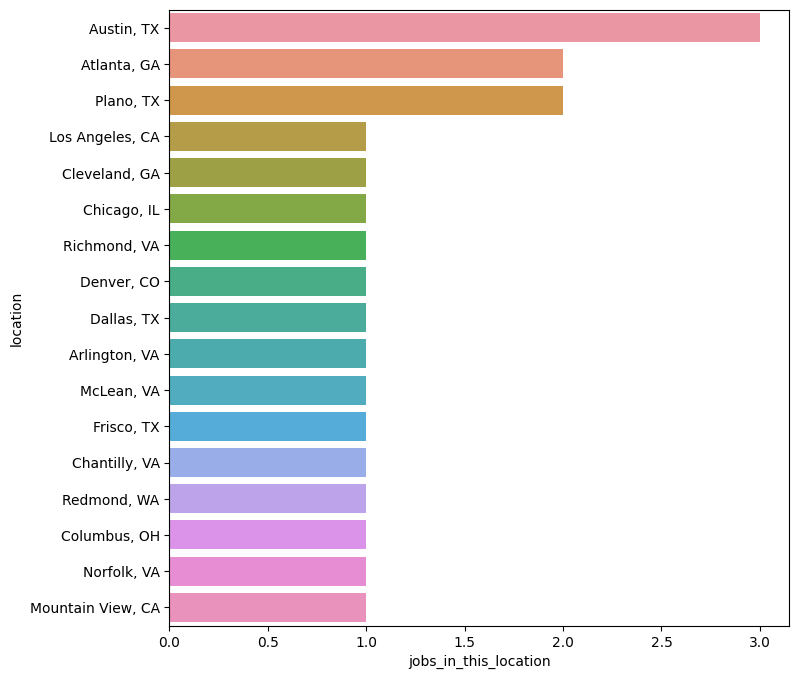

In [322]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
sns.barplot(y='location',x='jobs_in_this_location',data=locations)

In [325]:
titles_query = """
with main_query as (select job_id, c.name, title, formatted_work_type as work_type, location
from job_postings t1, unnest(%s) j_id, companies c
where job_id::text = j_id::text
and c.company_id = t1.company_id) 
select title, count(*) as job_titles
from main_query
group by title
order by count(*) desc
"""

In [326]:
titles = runQuery(titles_query, (jobs,))

In [332]:
titles['title'] = titles['title'].apply(clean_text)

<AxesSubplot: xlabel='job_titles', ylabel='title'>

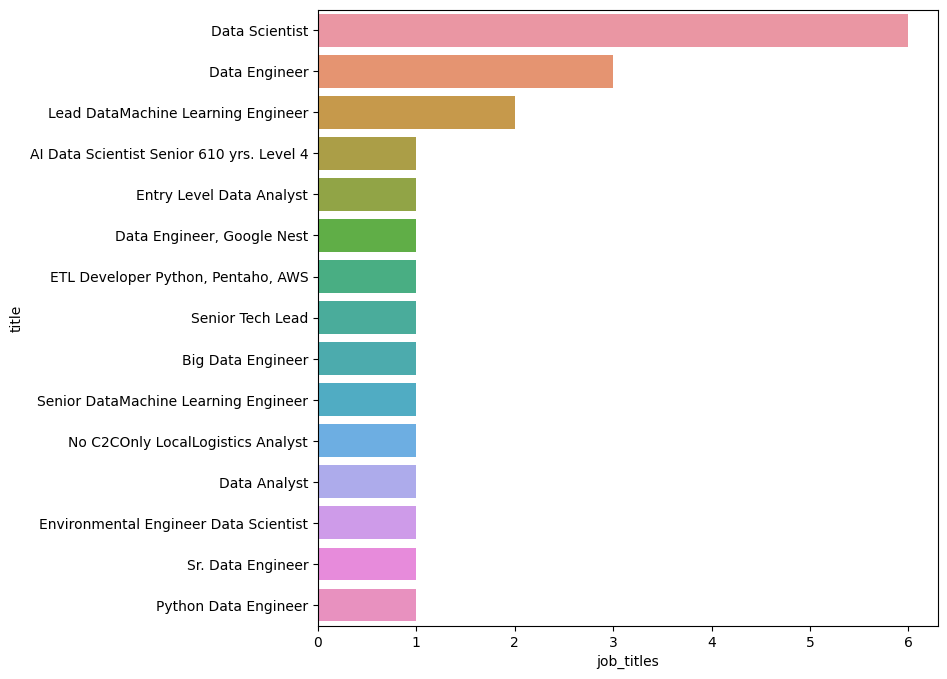

In [333]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
sns.barplot(y='title',x='job_titles',data=titles)

### Graph

In [217]:
import pandas as pd
import json
from utils import mongo_utils, pandas_utils, neo4j_utils
import matplotlib.pyplot as plt
from py2neo import Graph, Node, Relationship
import networkx as nx

In [218]:
neo_creds = {
    'host': 'localhost',
    'port': '7687',
    'user': 'neo4j',
    'password': 'Aagaaz@786'
}

neoCon = neo4j_utils.neo_connector(creds=neo_creds)

In [219]:
uri = 'bolt://localhost:7687'

In [220]:
graph = Graph(uri, auth=(neo_creds['user'], neo_creds['password']))

In [265]:
graph_query = """match p=(n1)-[:SIMILAR_TO]-(d) 
where n1.name IN $array
return p"""

In [288]:
result = graph.run(graph_query, parameters={"array": company_names})

In [289]:
result

p
(Thoughtworks)<-[:SIMILAR_TO {}]-(3 Tenets Optimization)
(Thoughtworks)<-[:SIMILAR_TO {}]-(3IS Solutions Inc)
(Virtusa)<-[:SIMILAR_TO {}]-(Auxenta)


In [290]:
G = nx.Graph()

# Extract nodes and relationships from the result
for record in result:
    print(result)
    for rel in record["p"].relationships:
        G.add_edge(rel.start_node["name"], rel.end_node["name"])

 p                                                    
------------------------------------------------------
 (Thoughtworks)<-[:SIMILAR_TO {}]-(3IS Solutions Inc) 
 (Virtusa)<-[:SIMILAR_TO {}]-(Auxenta)                
 (Booz Allen Hamilton)<-[:SIMILAR_TO {}]-(1901 Group) 

 p                                                    
------------------------------------------------------
 (Virtusa)<-[:SIMILAR_TO {}]-(Auxenta)                
 (Booz Allen Hamilton)<-[:SIMILAR_TO {}]-(1901 Group) 
 (Google)<-[:SIMILAR_TO {}]-(1863 Ventures)           

 p                                                    
------------------------------------------------------
 (Booz Allen Hamilton)<-[:SIMILAR_TO {}]-(1901 Group) 
 (Google)<-[:SIMILAR_TO {}]-(1863 Ventures)           
 (Google)<-[:SIMILAR_TO {}]-(2mrw)                    

 p                                           
---------------------------------------------
 (Google)<-[:SIMILAR_TO {}]-(1863 Ventures)  
 (Google)<-[:SIMILAR_TO {}]-(2mrw)

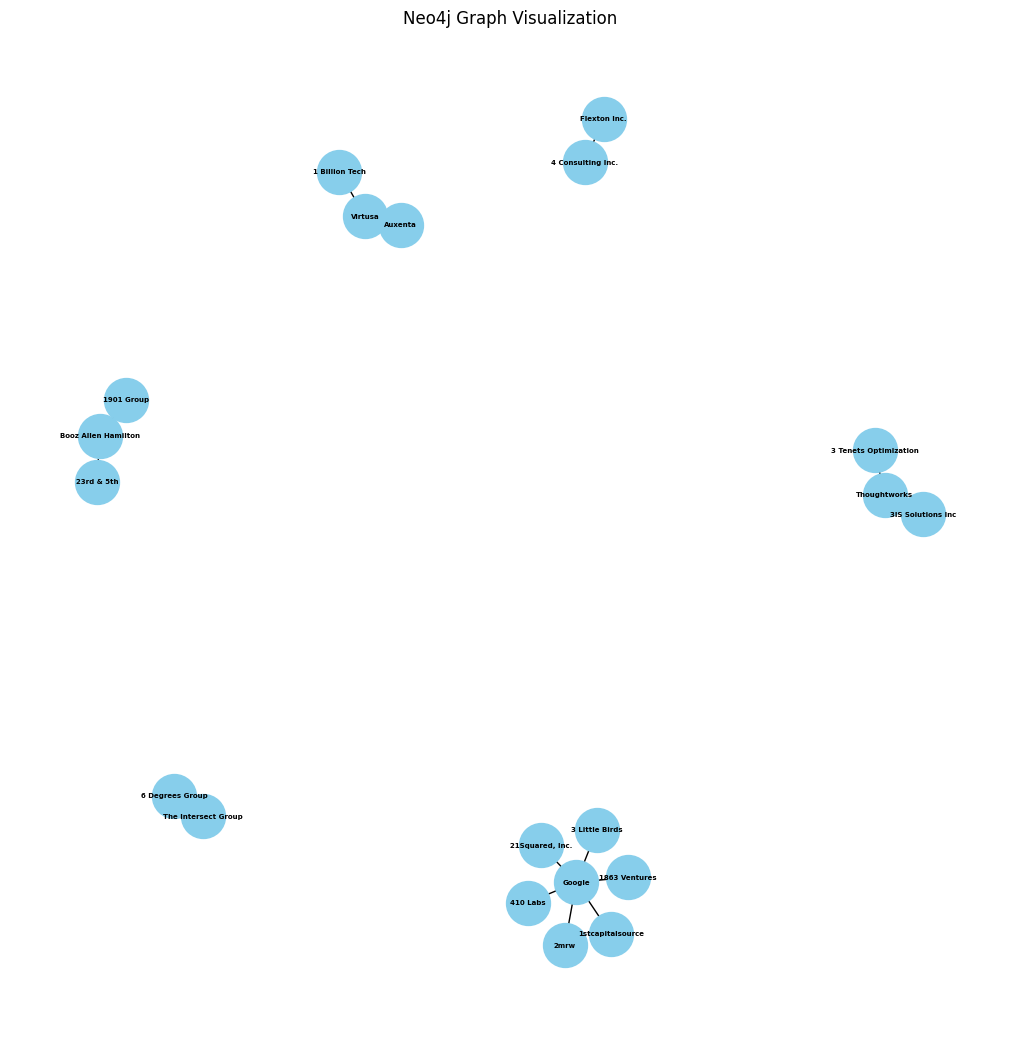

In [304]:
pos = nx.spring_layout(G)  # You can change the layout algorithm as needed

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000, font_size=5)
plt.title("Neo4j Graph Visualization")
plt.show()